# **<center>Store Sales - Time Series Forecasting</center>**

# **1. Mô tả bộ dữ liệu:**

- Trong thế giới kinh doanh hiện đại, dự báo sản phẩm và doanh thu là một công việc vô cùng quan trọng. Việc dự báo giúp các doanh nghiệp, đặc biệt là các siêu thị truyền thống, quản lý lượng hàng tồn kho một cách hiệu quả, giảm thiểu lãng phí hàng hóa và đảm bảo đáp ứng nhu cầu của khách hàng. Tuy nhiên, phương pháp dự báo truyền thống thường khó có thể tự động hóa và thiếu chính xác. Đó là lý do tại sao các nhà khoa học dữ liệu đã phân tích và sử dụng mô hình học máy để tạo ra các mô hình dự báo mạnh mẽ hơn, giúp các doanh nghiệp nâng cao hiệu quả kinh doanh và đem lại sự hài lòng cho khách hàng. 

- Mục tiêu của chúng ta là sẽ dự đoán doanh số bán hàng của hàng nghìn nhóm sản phẩm được bán tại các cửa hàng Favorita ở Ecuador. Dữ liệu huấn luyện bao gồm thông tin về ngày, cửa hàng và sản phẩm, thông tin về chương trình khuyến mãi cũng như số lượng bán hàng. Các tệp tin bổ sung cung cấp thông tin hữu ích để giúp xây dựng mô hình. Nó sẽ giúp giảm thiểu lãng phí thực phẩm và nâng cao sự hài lòng của khách hàng.
 
- Bộ dữ liệu được cung cấp (7 files):
  - **holidays_events.csv**
    - `date`: Ngày
    - `type`: Loại ngày (Ngày lễ, ngày làm,...)
    - `locale`: Loại khu vực (Địa phương, khu vực, quốc gia)
    - `locale_name`: Tên khu vực
    - `description`: Mô tả ngày lễ
    - `transferred`: Ngày đó có phải được chuyển từ ngày nghỉ lễ khác hay không? (vì ngày nghỉ bù vẫn tính là ngày lễ)
  - **oil.csv**
    - `date`: Ngày
    - `dcoilwtico`: Giá dầu
  - **stores.csv**
    - `store_nbr`: Id cửa hàng
    - `city`: Thành phố
    - `state`: Tiểu bang
    - `type`: Loại cửa hàng
    - `cluster`: Là một nhóm các cửa hàng tương tự
  - **train.csv**
    - `date`: Ngày
    - `store_nbr`: Id cửa hàng
    - `family`: Id loại sản phẩm
    - `sale`: Tổng doanh số cho một loại sản phẩm vào một ngày nhất định
    - `onpromotion`: Tổng số sản phẩm khuyến mãi của một loại vào một ngày nhất định của một cửa hàng
  - **test.csv**
    - Gồm các đặc trưng của **train.csv** nhưng không có đặc trưng `sale`
  - **transactions.csv**
    - `date`: Ngày
    - `store_nbr`: Id cửa hàng
    - `transactions`: Số lượng giao dịch
  - **sample_submission.csv**
    - File mẫu để nộp đúng định dạng

- Bộ dữ liệu: [Link Kaggle](https://www.kaggle.com/competitions/store-sales-time-series-forecasting)

# **2. Thống kê mô tả dữ liệu:**

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

In [ ]:
# Load data
df_holi = pd.read_csv('holidays_events.csv')
df_oil = pd.read_csv('oil.csv')
df_stores = pd.read_csv('stores.csv')
df_trans = pd.read_csv('transactions.csv')

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
# Kích thước file 
print("df_holi shape:",df_holi.shape)
print("df_oil shape:",df_oil.shape)
print("df_stores shape:",df_stores.shape)
print("df_trans shape:",df_stores.shape)
print("df_train shape:",df_train.shape)
print("df_test shape:",df_test.shape)

df_holi shape: (350, 6)
df_oil shape: (1218, 2)
df_stores shape: (54, 5)
df_trans shape: (54, 5)
df_train shape: (3000888, 6)
df_test shape: (28512, 5)


In [ ]:
# Các đặc trưng của dữ liệu
print("Đặc trưng của df_holi:",list(df_holi.columns))
print("Đặc trưng của df_oil:",list(df_oil.columns))
print("Đặc trưng của df_stores:",list(df_stores.columns))
print("Đặc trưng của df_trans:",list(df_trans.columns))
print("Đặc trưng của df_train:",list(df_train.columns))
print("Đặc trưng của df_test:",list(df_test.columns))

Đặc trưng của df_holi: ['date', 'type', 'locale', 'locale_name', 'description', 'transferred']
Đặc trưng của df_oil: ['date', 'dcoilwtico']
Đặc trưng của df_stores: ['store_nbr', 'city', 'state', 'type', 'cluster']
Đặc trưng của df_trans: ['date', 'store_nbr', 'transactions']
Đặc trưng của df_train: ['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']
Đặc trưng của df_test: ['id', 'date', 'store_nbr', 'family', 'onpromotion']


Vì các file ***holidays_events.csv***, ***oil.csv***, ***stores.csv*** bổ sung thông tin cho tập train và tập test. Do đó ta sẽ thêm thông tin của 3 file này cho tập train và tập test.

In [ ]:
# Merge the datasets
df_train_merged = pd.merge(df_train, df_stores, how='left', on='store_nbr')
df_train_merged = pd.merge(df_train_merged, df_trans, how='left', on=['store_nbr', 'date'])
df_train_merged = pd.merge(df_train_merged, df_oil, how='left', on='date')
df_train_merged = pd.merge(df_train_merged, df_holi, how='left', on='date')

df_train_merged = df_train_merged.rename(columns = {"type_x" : "store_type", "type_y" : "holiday_type","dcoilwtico" : "oil_price"})

In [ ]:
df_train_merged.sample(5)

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,oil_price,holiday_type,locale,locale_name,description,transferred
3046922,2993462,2017-08-11,5,SEAFOOD,8.402,4,Santo Domingo,Santo Domingo de los Tsachilas,D,4,1183.0,48.81,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
2934916,2886802,2017-06-12,8,POULTRY,573.297,0,Quito,Pichincha,D,8,2543.0,46.10,NaN,NaN,NaN,NaN,NaN
1998590,1971860,2016-01-15,36,FROZEN FOODS,100.399,0,Libertad,Guayas,E,10,1078.0,29.45,NaN,NaN,NaN,NaN,NaN
836382,827472,2014-04-11,26,PRODUCE,3.000,0,Guayaquil,Guayas,D,10,623.0,103.68,NaN,NaN,NaN,NaN,NaN
1596826,1577224,2015-06-07,13,"LIQUOR,WINE,BEER",0.000,0,Latacunga,Cotopaxi,C,15,1113.0,NaN,NaN,NaN,NaN,NaN,NaN


Kích thước tập train sau khi merge

In [ ]:
print("df_train_merged shape:",df_train_merged.shape)

df_train_merged shape: (3054348, 17)


-> Gồm 3054348 hàng và 17 cột

In [ ]:
df_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   city          object 
 7   state         object 
 8   store_type    object 
 9   cluster       int64  
 10  transactions  float64
 11  oil_price     float64
 12  holiday_type  object 
 13  locale        object 
 14  locale_name   object 
 15  description   object 
 16  transferred   object 
dtypes: float64(3), int64(4), object(10)
memory usage: 419.5+ MB


Số lượng giá trị unique

In [ ]:
for col in df_train_merged.columns:
    print('{} : {} giá trị'.format(col,df_train_merged[col].nunique()))

id : 3000888 giá trị
date : 1684 giá trị
store_nbr : 54 giá trị
family : 33 giá trị
sales : 379610 giá trị
onpromotion : 362 giá trị
city : 22 giá trị
state : 16 giá trị
store_type : 5 giá trị
cluster : 17 giá trị
transactions : 4993 giá trị
oil_price : 994 giá trị
holiday_type : 6 giá trị
locale : 3 giá trị
locale_name : 24 giá trị
description : 101 giá trị
transferred : 2 giá trị


Các giá trị trong đặc trưng

In [ ]:
list_feats = ['family','city','state','holiday_type','cluster','store_type','locale','locale_name','transferred']
for col in list_feats:
    print('{} : {}\n'.format(col,df_train_merged[col].unique()))

family : ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']

city : ['Quito' 'Cayambe' 'Latacunga' 'Riobamba' 'Ibarra' 'Santo Domingo'
 'Guaranda' 'Puyo' 'Ambato' 'Guayaquil' 'Salinas' 'Daule' 'Babahoyo'
 'Quevedo' 'Playas' 'Libertad' 'Cuenca' 'Loja' 'Machala' 'Esmeraldas'
 'Manta' 'El Carmen']

state : ['Pichincha' 'Cotopaxi' 'Chimborazo' 'Imbabura'
 'Santo Domingo de los Tsachilas' 'Bolivar' 'Pastaza' 'Tungurahua'
 'Guayas' 'Santa Elena' 'Los Rios' 'Azuay' 'Loja' 'El Oro' 'Esmeraldas'
 'Manabi']

holiday_type : ['Holiday' nan 'Work Day' 'Additional' 'Event' 'Transfer' 'Bridge']

c

### Các đặc trưng dạng Categorical:

In [ ]:
categorical = ['store_nbr','family','city','state','holiday_type','cluster','store_type','locale','locale_name','transferred']
df_train_merged[categorical].astype('object').describe().T

,count,unique,top,freq
store_nbr,3054348,54,1,56562
family,3054348,33,AUTOMOTIVE,92556
city,3054348,22,Quito,1018116
state,3054348,16,Pichincha,1074678
holiday_type,502524,6,Holiday,304722
cluster,3054348,17,3,395934
store_type,3054348,5,D,1018116
locale,502524,3,National,261954
locale_name,502524,24,Ecuador,261954
transferred,502524,2,False,486486


**Nhận xét**: 
- Đa số cửa hàng nằm ở thành phố Quito trong tiểu bang Pichincha
- Loại hàng bán được nhiều nhất là Automotive
- Chủ yếu là ngày lễ Quốc gia Ecuador
- Cửa hàng loại D chiếm phần lớn

### Các đặc trưng dạng Numerical:

In [ ]:
numerical = ['sales','onpromotion','oil_price','transactions']
df_train_merged[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
sales,3054348.0,359.020892,1107.285897,0.00,0.00,11.00,196.011,124717.00
onpromotion,3054348.0,2.617480,12.254939,0.00,0.00,0.00,0.000,741.00
oil_price,2099196.0,68.015874,25.691342,26.19,46.41,53.43,95.810,110.62
transactions,2805231.0,1697.071441,966.831652,5.00,1046.00,1395.00,2081.000,8359.00


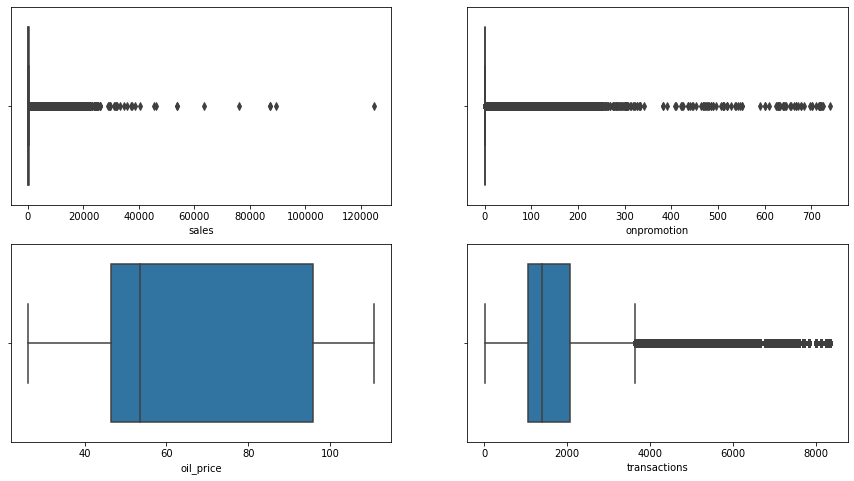

In [ ]:
# Boxplot của các đặc trưng
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

sns.boxplot(x='sales', data=df_train_merged, ax=axs[0, 0])

sns.boxplot(x='onpromotion', data=df_train_merged, ax=axs[0, 1])

sns.boxplot(x='oil_price', data=df_train_merged, ax=axs[1, 0])

sns.boxplot(x='transactions', data=df_train_merged, ax=axs[1, 1]);


**Nhận xét:**
- Đặc trưng `nopromotion` có hơn 75% dữ liệu mang giá trị 0
- Đặc trưng `sales`,`onpromotion`,`transactons` có nhiều giá trị ngoại lai.

# **3. Tiền xử lý dữ liệu:**

In [ ]:
df_train_merged.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,oil_price,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [ ]:
df_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   city          object 
 7   state         object 
 8   store_type    object 
 9   cluster       int64  
 10  transactions  float64
 11  oil_price     float64
 12  holiday_type  object 
 13  locale        object 
 14  locale_name   object 
 15  description   object 
 16  transferred   object 
dtypes: float64(3), int64(4), object(10)
memory usage: 419.5+ MB


Xóa cột `Id`, `description`

In [ ]:
df_train_merged.drop(['id','description'],axis =1, inplace = True)

Chuyển cột `date` về đúng định dạng ***datetime***

In [ ]:
df_train_merged['date']=pd.to_datetime(df_train_merged['date'])

Kiểm tra dữ liệu thiếu:

In [ ]:
# tính tỉ lệ giá trị thiếu
df_train_merged.isna().sum() / df_train_merged.shape[0]

date            0.000000
store_nbr       0.000000
family          0.000000
sales           0.000000
onpromotion     0.000000
city            0.000000
state           0.000000
store_type      0.000000
cluster         0.000000
transactions    0.081561
oil_price       0.312719
holiday_type    0.835473
locale          0.835473
locale_name     0.835473
transferred     0.835473
dtype: float64

- Các đặc trưng `holiday_type`,`locale`,`locale_name`,`transferrred` thiếu dữ liệu vì đa số dữ liệu thu thập không phải là ngày lễ nên không có thông tin những trường này.

- Giá dầu chúng ta có thể điền bằng phương pháp lấy trung bình giá dầu của hai ngày bên cạnh.

In [ ]:
# Điền giá trị thiếu bằng phương pháp linear interpolate
df_train_merged['oil_price'] = df_train_merged['oil_price'].interpolate()

Kiểm tra dữ liệu trùng lặp

In [ ]:
print("Số dòng dữ liệu trùng lặp:",df_train_merged.duplicated().sum())

Số dòng dữ liệu trùng lặp: 0


# **4. Trực quan hóa dữ liệu:**

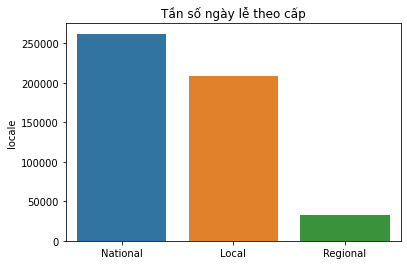

In [ ]:
sns.barplot(x = df_train_merged['locale'].value_counts().index,y = df_train_merged['locale'].value_counts())
plt.title("Tần số ngày lễ theo cấp")
plt.show()

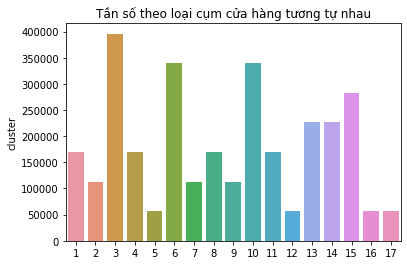

In [ ]:
sns.barplot(x = df_train_merged['cluster'].value_counts().index,y = df_train_merged['cluster'].value_counts())
plt.title("Tần số theo loại cụm cửa hàng tương tự nhau")
plt.show()

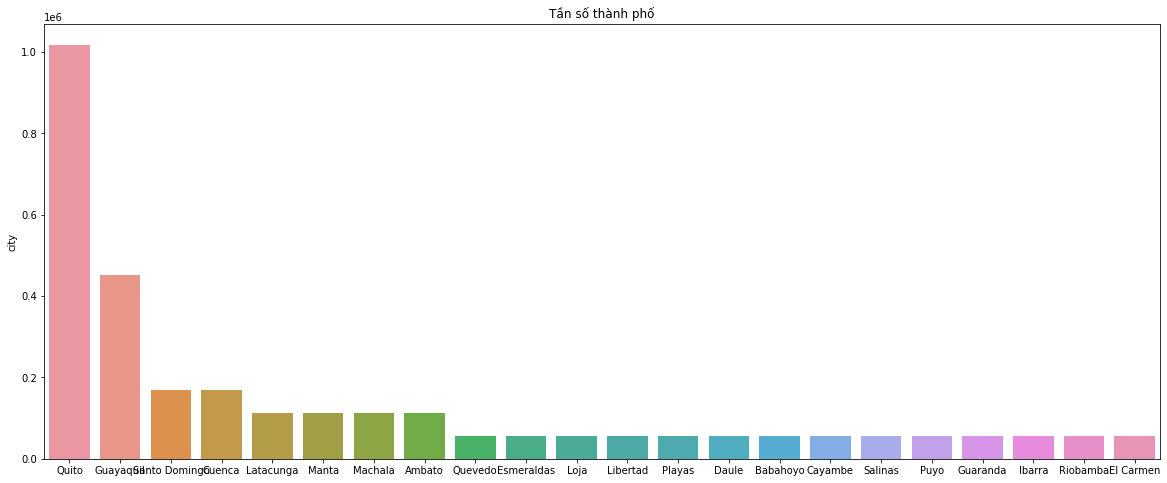

In [ ]:
plt.figure(figsize=(20,8))

sns.barplot(x = df_train_merged['city'].value_counts().index,y = df_train_merged['city'].value_counts())
plt.title("Tần số thành phố")
plt.show()

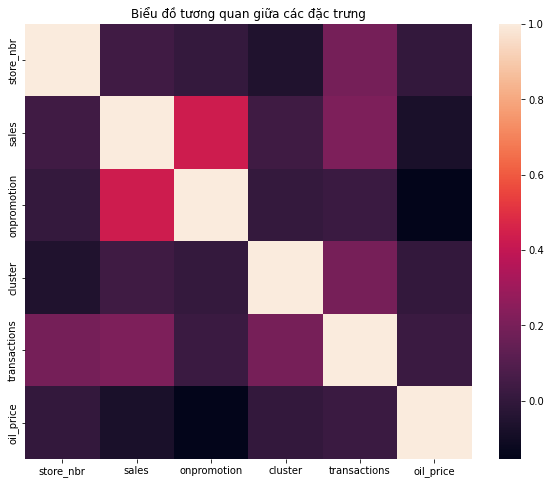

In [ ]:
corr = df_train_merged.corr()
plt.figure(figsize=(10,8))
plt.title("Biểu đồ tương quan giữa các đặc trưng")
sns.heatmap(corr);

**Nhận xét:**
- Các đặc trưng không có sự tương quan mạnh

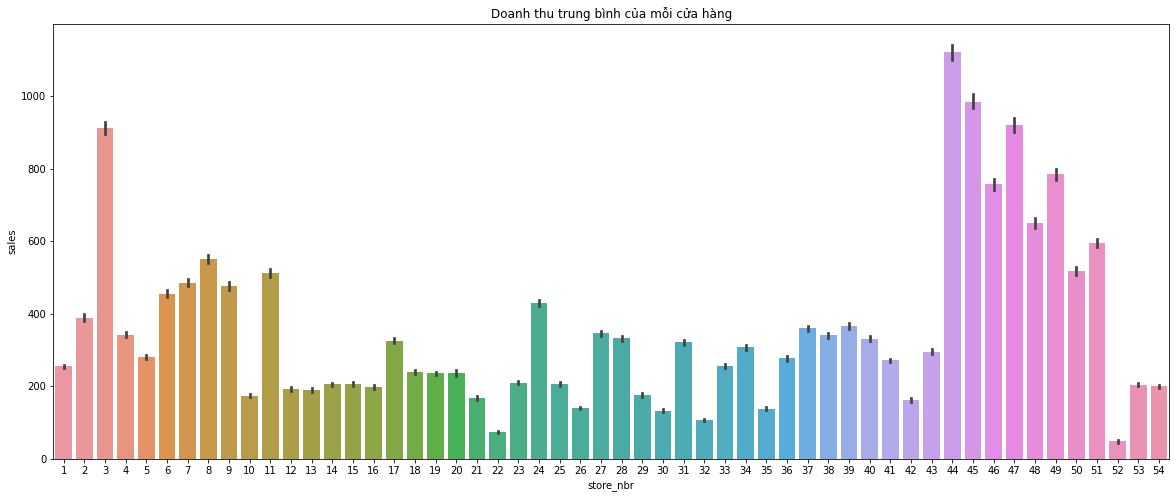

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'store_nbr',y = 'sales',data = df_train_merged)
plt.title("Doanh thu trung bình của mỗi cửa hàng")
plt.show()

**Nhận xét:**
- Có nhiều cửa hàng có doanh thu trên 400
- Cửa hàng 44,45,47 là top 3 cửa hàng có doanh thu cao nhất.
- Cửa hàng 22, 52 có doanh thu khá khiêm tốn.

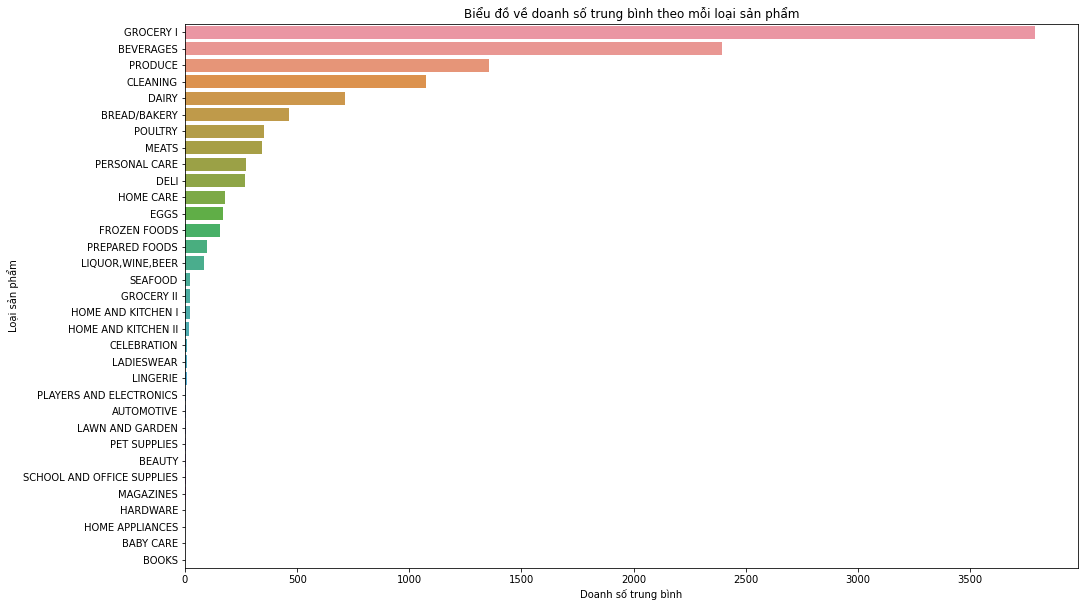

In [ ]:
temp=df_train_merged.groupby('family')['sales'].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,10))
sns.barplot(data=temp,x=temp.sales,y=temp.index,ci=None,order=list(temp.index))
plt.xlabel('Doanh số trung bình')
plt.ylabel('Loại sản phẩm')
plt.title('Biểu đồ về doanh số trung bình theo mỗi loại sản phẩm')
plt.show()

**Nhận xét:**
- Các loại sản phẩm có doanh số tốt nhất là:  GROCERY I, BEVERAGES, PRODUCE, CLEANING, DAIRY
- Các loại sản phẩm có doanh số thấp nhất là:  MAGAZINES, HARDWARE, HOME APPLIANCES, BABY CARE, BOOKS
- Có sự chênh lệch doanh số giữa các sản phẩm bán chạy khá mạnh.

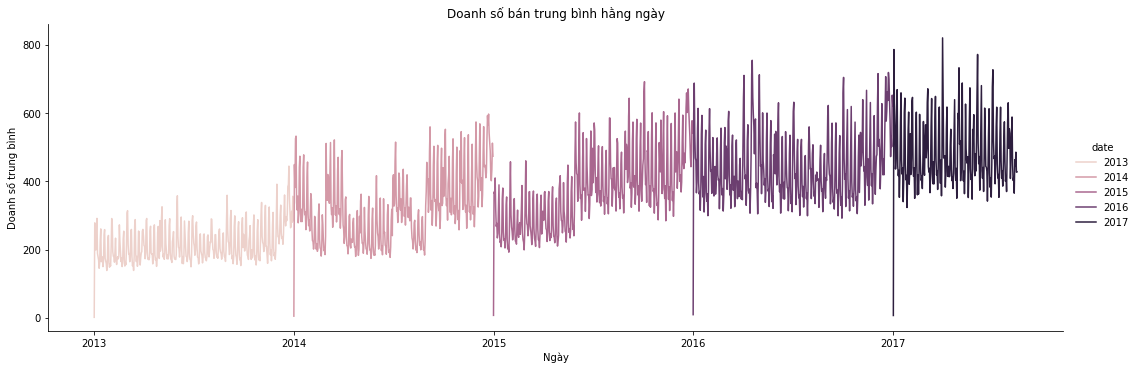

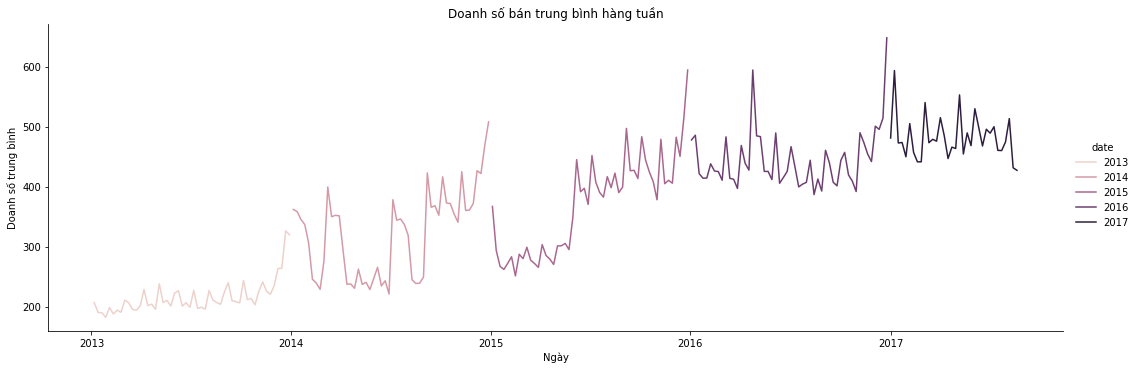

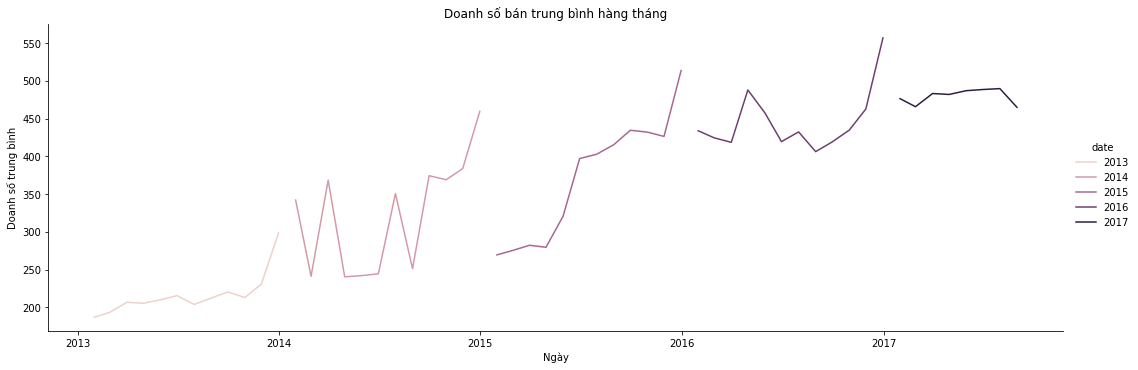

In [ ]:
train_eda = df_train_merged.copy()

train_eda=train_eda.set_index('date')

daily_sales=train_eda.resample('D').sales.mean().to_frame()
weekly_sales=train_eda.resample('W').sales.mean().to_frame() 
monthly_sales=train_eda.resample('M').sales.mean().to_frame()

df=[daily_sales,weekly_sales,monthly_sales]
titles=['Doanh số bán trung bình hằng ngày','Doanh số bán trung bình hàng tuần','Doanh số bán trung bình hàng tháng']

for i,j in zip(df,titles):
    
    sns.relplot(x=i.index,y=i.sales,kind='line',aspect=3,hue=i.index.year)
    plt.xlabel('Ngày')
    plt.ylabel('Doanh số trung bình')
    plt.title(j)

**Nhận xét:**
- Doanh số bán trung bình giảm ở đầu năm, tăng ở cuối năm
- Trong năm 2015, doanh số trung bình hàng tháng tăng mạnh
- Có sự đứt gãy từ cuối năm 2014 đến đầu năm 2015
- Doanh số bán trung bình trong năm 2014 không ổn định, đường line dao động hàng tuần rất mạnh
- Doanh số  bán trung bình trong năm 2017 ổn định
- Nhìn chung doanh số trung bình có xu hướng tăng lên qua các năm

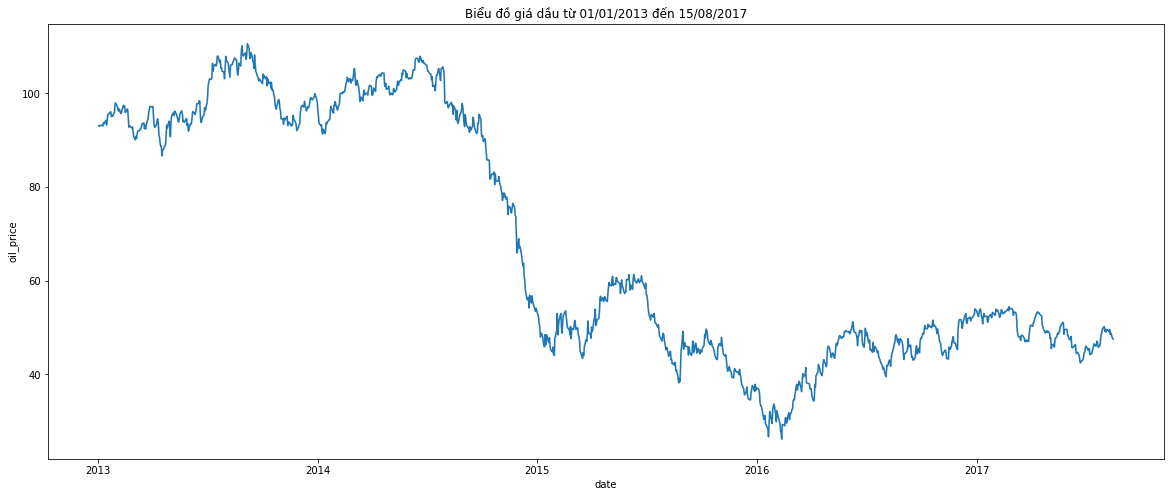

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_train_merged, x='date', y='oil_price')

plt.title('Biểu đồ giá dầu từ 01/01/2013 đến 15/08/2017')
plt.show()

**Nhận xét:**
- Giá dầu giảm mạnh vào cuối năm 2014, có thể đây là lý do khiến cho biểu đồ đường doanh thu bán hàng trung bình bị đứt gãy mạnh.

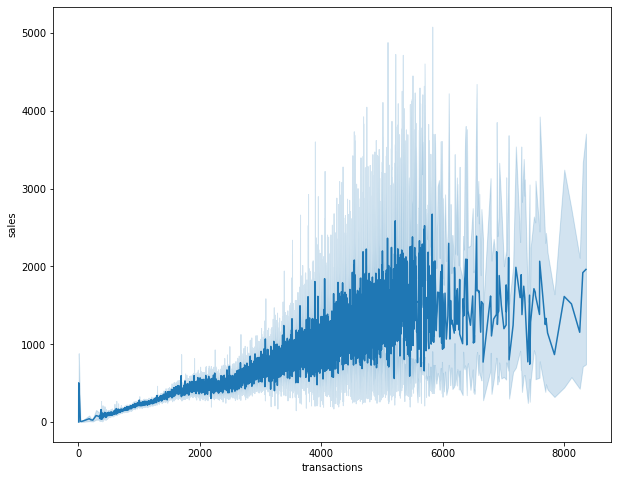

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x = "transactions",y = 'sales',data = df_train_merged);

**Nhận xét:**
- Số lượng giao dịch và doanh số tỉ lệ thuận với nhau
- Số lượng giao dịch càng lớn thì khoảng tin cậy doanh số càng lớn

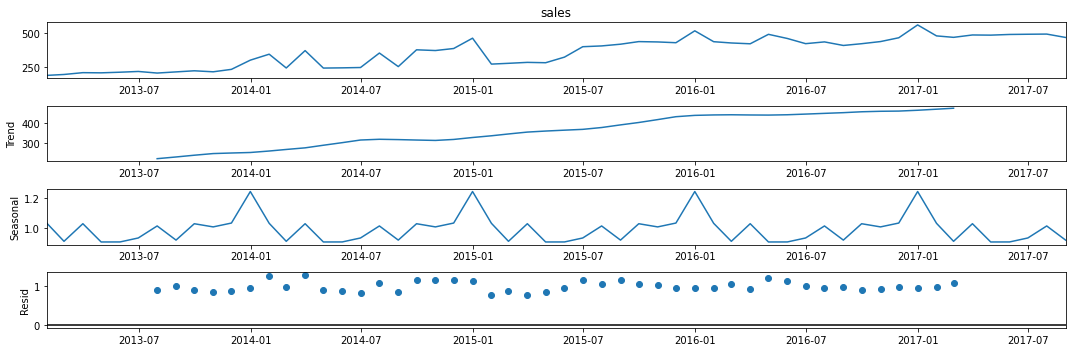

In [ ]:
import statsmodels.api as sm
df_train=df_train_merged.copy().set_index('date')
df_train_month=df_train.resample('M').mean()
res = sm.tsa.seasonal_decompose(df_train_month['sales'],
                                model='multiplicative')
plt.rcParams["figure.figsize"] = (15,5)
resplot = res.plot()

**Nhận xét:**
- Xu hướng doanh số tăng theo từng năm
- Thành phần mùa vụ lặp lại theo từng năm
- Độ nhiễu ảnh hưởng nhiều từ 2013-2015

# **5. Giả thuyết:**

### 5.1 Giá dầu có ảnh hưởng đến doanh số của các cửa hàng?

* Giá dầu cao có thể dẫn đến giá cả tăng, từ đó ảnh hưởng đến số lượng sản phẩm được bán ra.

Không có sự tương quan giữa giá dầu và doanh số cửa hàng


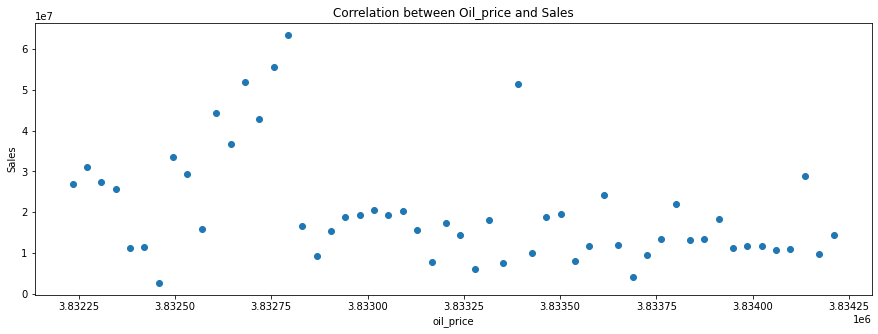

In [ ]:
from scipy.stats import pearsonr

df_merged = df_train_merged[['store_nbr', 'sales', 'oil_price']]
df_merged = df_merged.dropna()
df_merged = df_merged.groupby('store_nbr').agg({'sales': 'sum', 'oil_price': 'sum'})

# Tính toán hệ số tương quan giữa giá dầu và doanh số cửa hàng
corr, _ = pearsonr(df_merged['oil_price'], df_merged['sales'])
if corr > 0:
    print("Có sự tương quan dương giữa giá dầu và doanh số cửa hàng")
else:
    print("Không có sự tương quan giữa giá dầu và doanh số cửa hàng")

# Vẽ biểu đồ tương quan giữa giá dầu và doanh số cửa hàng
plt.scatter(df_merged['oil_price'], df_merged['sales'])
plt.xlabel('oil_price')
plt.ylabel('Sales')
plt.title('Correlation between Oil_price and Sales')
plt.show()

### 5.2 Ngày lễ và các ngày nghỉ có ảnh hưởng đến doanh số của các cửa hàng?

* Ngày lễ và các ngày nghỉ có thể dẫn đến nhu cầu mua sắm tăng và doanh số tăng lên.

In [ ]:
sales_df = df_train_merged.copy()

# Tính toán doanh số trung bình của các ngày lễ và các ngày bình thường
holiday_sales = sales_df[sales_df['date'].isin(df_holi['date'])]['sales'].mean()
non_holiday_sales = sales_df[~sales_df['date'].isin(df_holi['date'])]['sales'].mean()

print("Doanh số trung bình ngày nghỉ: ", holiday_sales)
print("Doanh số trung bình ngày thường: ", non_holiday_sales)
if holiday_sales > non_holiday_sales:
    print("Ngày lễ và các ngày nghỉ ảnh hưởng đến doanh số cửa hàng")
else:
    print("Ngày lễ và các ngày nghỉ không ảnh hưởng đến doanh số cửa hàng")


Doanh số trung bình ngày nghỉ:  393.86476153783434
Doanh số trung bình ngày thường:  352.15918056230004
Ngày lễ và các ngày nghỉ ảnh hưởng đến doanh số cửa hàng


### 5.3 Các đặc trưng của cửa hàng có thể ảnh hưởng đến doanh số?

* Các cửa hàng có thể khác nhau về loại sản phẩm, vị trí địa lý và kiểu cửa hàng, có thể ảnh hưởng đến doanh số.

Các đặc trưng của cửa hàng có ảnh hưởng đến doanh số


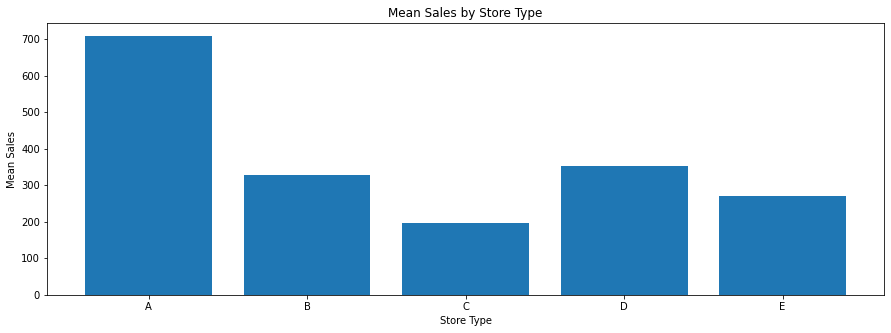

In [ ]:
from scipy.stats import f_oneway

sales_df = df_train_merged.copy()

# Tính trung bình doanh số của từng nhóm cửa hàng dựa trên đặc trưng
grouped_df = sales_df.groupby('store_type')['sales'].mean()

# Kiểm định Anova
statistic, pvalue = f_oneway(sales_df[sales_df['store_type'] == 'A']['sales'],
sales_df[sales_df['store_type'] == 'B']['sales'],
sales_df[sales_df['store_type'] == 'C']['sales'],
sales_df[sales_df['store_type'] == 'D']['sales'],
sales_df[sales_df['store_type'] == 'E']['sales'])

if pvalue < 0.05:
  print("Các đặc trưng của cửa hàng có ảnh hưởng đến doanh số")
else:
  print("Các đặc trưng của cửa hàng không ảnh hưởng đến doanh số")

# Vẽ biểu đồ trung bình doanh số của từng nhóm cửa hàng
plt.bar(grouped_df.index, grouped_df.values)
plt.xlabel('Store Type')
plt.ylabel('Mean Sales')
plt.title('Mean Sales by Store Type')
plt.show()

### 5.4 Số lượng giao dịch có thể ảnh hưởng đến doanh số của các cửa hàng?

* Số lượng giao dịch có thể phản ánh mức độ phát triển của một cửa hàng và có thể ảnh hưởng đến doanh số.

Có sự tương quan dương giữa số lượng giao dịch và doanh số cửa hàng


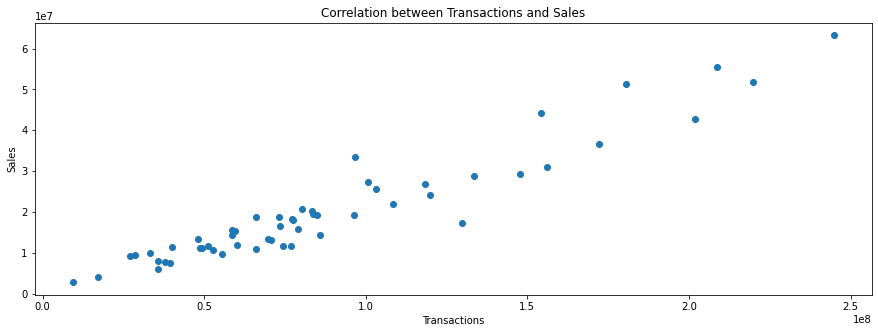

In [ ]:
sales_df = df_train_merged[['store_nbr', 'transactions', 'sales']]
sales_df = sales_df.dropna()
sales_df = sales_df.groupby('store_nbr').agg({'transactions': 'sum', 'sales': 'sum'})

#Tính toán hệ số tương quan giữa số lượng giao dịch và doanh số cửa hàng
corr, _ = pearsonr(sales_df['transactions'], sales_df['sales'])

if corr > 0:
  print("Có sự tương quan dương giữa số lượng giao dịch và doanh số cửa hàng")
else:
  print("Không có sự tương quan giữa số lượng giao dịch và doanh số cửa hàng")

# Vẽ biểu đồ tương quan giữa số lượng giao dịch và doanh số cửa hàng
plt.scatter(sales_df['transactions'], sales_df['sales'])
plt.xlabel('Transactions')
plt.ylabel('Sales')
plt.title('Correlation between Transactions and Sales')
plt.show()

### 5.5 Chương trình khuyến mãi (onpromotion) có thể ảnh hưởng đến doanh số của các cửa hàng?

* Chương trình khuyến mãi có thể tăng khả năng bán hàng và doanh số của cửa hàng.

In [ ]:
sales_df = df_train_merged.copy()

# Tạo cột mới để lưu giá trị boolean cho việc có chương trình khuyến mãi hay không
sales_df['has_promotion'] = sales_df['onpromotion'].apply(lambda x: True if (str(x) == '1') else False)

# Tạo 2 data frame, một cho cửa hàng có chương trình khuyến mãi và một cho cửa hàng không có chương trình khuyến mãi
sales_with_promotion = sales_df[sales_df['has_promotion'] == True]
sales_without_promotion = sales_df[sales_df['has_promotion'] == False]

# Tính toán tổng doanh số cho cửa hàng có chương trình khuyến mãi và cửa hàng không có chương trình khuyến mãi
total_sales_with_promotion = sales_with_promotion['sales'].sum()
total_sales_without_promotion = sales_without_promotion['sales'].sum()

# So sánh doanh số của cửa hàng có chương trình khuyến mãi với doanh số của cửa hàng không có chương trình khuyến mãi
print("Doanh số có khuyến mãi: ", total_sales_with_promotion)
print("Doanh số không khuyến mãi: ", total_sales_without_promotion)
if total_sales_with_promotion > total_sales_without_promotion:
  print("Chương trình khuyến mãi ảnh hưởng đến doanh số cửa hàng")
else:
  print("Chương trình khuyến mãi không ảnh hưởng đến doanh số cửa hàng")

Doanh số có khuyến mãi:  83981703.24353021
Doanh số không khuyến mãi:  1012593040.9627197
Chương trình khuyến mãi không ảnh hưởng đến doanh số cửa hàng
